# CAUSAL GRAPHS IN ACTION

In [1]:
from dag import *

This notebook imports our coded dag module and lets the user test its functionality by inputting different variations of a DAGs

We implemented an algorithm that, given a DAG, an exposure variable, an outcome variable, and a proposed set of adjustment variables, returns true if the set is a valid adjustment set and false otherwise. The user first needs to instantiate a `Dag` class, which takes the following inputs:

    scm: Structural causal model - dictionary, where key: cause (str), values (list of str): effected variables
    exposure: string, e.g. "D"
    outcome: string, e.g. "Y"

For the `scm` *all* nodes need to be supplied as keys to the dictionary. If they have no descendants, they should be assigned an empty list. To test for valid adjustment set the user just needs to supply the proposed set:

     proposed_set: string or list of strings, e.g. "C" or ["C", "X"] or "".
     
Path finding has been implemented from scratch. In case of potential backdoor paths the user can also check if/how their proposed set affects those paths `dag.final_backdoor_paths` and whether paths have been closed or not `dag.back_door_closed`.

## Inputs for the function

Below we provide a simple example:

In [2]:
scm = {
    "D": ["Y", "X"],
    "Y": ["F"],
    "F": [],
    "X": [],
    "G": ["D", "Y", "I"],
    "H": ["F"],
    "I": []
}
outcome = "Y"
exposure = "D"
# instantiate the class:
dag = Dag(scm, outcome, exposure)

## Visualizing the graph

The `Dag` class has a `plot` method to draw a chart of the DAG. This uses helper functions from the `networks` library.

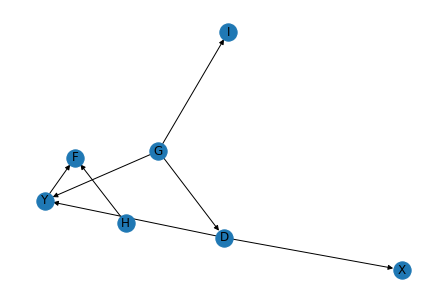

In [3]:
dag.plot()

## Check if valid adjustment set

Now let us check a few examples of proposed adjustment sets for this particular graph. The path that we need to worry about is the backdoor path leading through node *G*.

In [4]:
# Propose a VAS:
proposed_set = ["G"]
dag.is_valid_adjustment_set(proposed_set)

True

*G* is a VAS since it closes the backdoor path (indicated through a value of `1` for *G*). A backdoor path is closed if the sum of all node values is at least `1`.

In [5]:
print(dag.final_backdoor_paths)
print(dag.back_door_closed)

[{'G': 1, 'Y': 0}, {'G': inf, 'I': inf}]
[True, True]


You will note that `dag` also stores `{'G': inf, 'I': inf}`. This is a path leading through a parent of the exposure variable but never ends in the outcome variable. Adjusting for nodes on this path is always valid, hence their corresponding values default to `inf`. It is not strictly necessary to store these paths but turned out to be a convenient way of accounting for these valid adjustment sets.

Now let's try the empty set:

In [7]:
proposed_set = []
dag.is_valid_adjustment_set(proposed_set)

False

As expected this is not a valid adjustment set, since it leaves the backdoor path through *G* open:

In [8]:
print(dag.final_backdoor_paths)
print(dag.back_door_closed)

[{'G': 0, 'Y': 0}, {'G': inf, 'I': inf}]
[False, True]
